# Results - Stats, Plots

```python
import cartopy.crs as ccrs

bsamo.plot.pcolormesh(
    'xdim', 
    'ydim', 
    col='month', 
    col_wrap=3, 
    robust=True, 
    figsize=(16,18),
    #transform=ccrs.Sinusoidal(),
    #subplot_kws={'projection': ccrs.Sinusoidal(-82, 28)}
)

ax.set_yticklabels([])
ax.set_xticklabels([])

###########################3

bsa[0].plot.pcolormesh(x='x', y='y', robust=True, figsize=(10, 9),)
wsa[0].plot.pcolormesh(x='x', y='y', robust=True, figsize=(10, 9),)
alb[0].plot.pcolormesh(x='x', y='y', robust=True, figsize=(10, 9),)

```

## Plots

In [3]:
import glob
f = glob.glob("results/*"); f

['results/Albedos_MCD43A1.2018_back.nc']

### io

In [59]:
import xarray as xr
ds = xr.open_dataset(f[0]); ds

<xarray.Dataset>
Dimensions:             (time: 365, x: 1336, y: 1555)
Coordinates:
    lat                 (y, x) float64 ...
    lon                 (y, x) float64 ...
  * x                   (x) float64 -8.404e+06 -8.403e+06 ... -7.785e+06
  * time                (time) object 2018-01-01 00:00:00 ... 2018-12-31 00:00:00
  * y                   (y) float64 3.447e+06 3.447e+06 ... 2.728e+06 2.727e+06
    month               (time) int64 ...
Data variables:
    solar_zenith_angle  (time, y, x) float64 ...
Attributes:
    title:        MCD43A1.006 for aid0001
    Conventions:  CF-1.6
    institution:  Land Processes Distributed Active Archive Center (LP DAAC)
    source:       AppEEARS v2.23
    references:   See README.txt
    history:      See README.txt

### band access

In [60]:
b1 = xr.open_dataset(f[0], group="BRDF_Albedo_Parameters_Band1"); b1

<xarray.Dataset>
Dimensions:           (time: 365, x: 1336, y: 1555)
Coordinates:
  * x                 (x) float64 -8.404e+06 -8.403e+06 ... -7.785e+06
  * y                 (y) float64 3.447e+06 3.447e+06 ... 2.728e+06 2.727e+06
    lat               (y, x) float64 ...
    lon               (y, x) float64 ...
  * time              (time) object 2018-01-01 00:00:00 ... 2018-12-31 00:00:00
    month             (time) int64 ...
Data variables:
    blue_sky_albedo   (time, y, x) float64 ...
    black_sky_albedo  (time, y, x) float64 ...
    white_sky_albedo  (time, y, x) float32 ...

## Plots

In [57]:
%matplotlib inline
import cartopy.feature as feat
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', **{
    'family': 'normal', 
    'weight': 'normal', 
    'size': 16})

<xarray.Dataset>
Dimensions:             (time: 365, x: 1336, y: 1555)
Coordinates:
    lat                 (y, x) float64 ...
    lon                 (y, x) float64 ...
  * x                   (x) float64 -8.404e+06 -8.403e+06 ... -7.785e+06
  * time                (time) object 2018-01-01 00:00:00 ... 2018-12-31 00:00:00
  * y                   (y) float64 3.447e+06 3.447e+06 ... 2.728e+06 2.727e+06
    month               (time) int64 ...
Data variables:
    solar_zenith_angle  (time, y, x) float64 ...
Attributes:
    title:        MCD43A1.006 for aid0001
    Conventions:  CF-1.6
    institution:  Land Processes Distributed Active Archive Center (LP DAAC)
    source:       AppEEARS v2.23
    references:   See README.txt
    history:      See README.txt

BRDF_Albedo_Parameters_Band1
BRDF_Albedo_Parameters_Band2


/home/jack/Python/anaconda3/envs/jack/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


BRDF_Albedo_Parameters_Band3
BRDF_Albedo_Parameters_Band4
BRDF_Albedo_Parameters_Band5


RuntimeError: NetCDF: HDF error

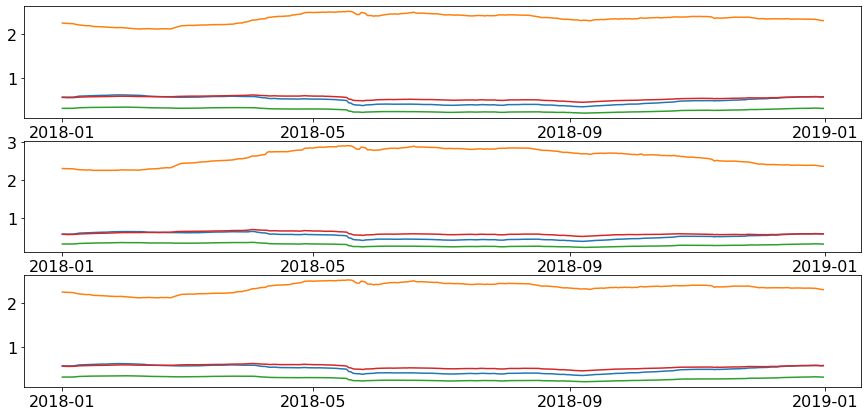

In [70]:
plt.figure(1, figsize=(15,7))

time = ds["time"]

# ----------------------------------------------------------------------------
# iterate over bands

for b in [
    "BRDF_Albedo_Parameters_Band1",
    "BRDF_Albedo_Parameters_Band2",
    "BRDF_Albedo_Parameters_Band3",
    "BRDF_Albedo_Parameters_Band4",
    "BRDF_Albedo_Parameters_Band5",
    "BRDF_Albedo_Parameters_Band6",
    "BRDF_Albedo_Parameters_Band7",
    "BRDF_Albedo_Parameters_nir",
    "BRDF_Albedo_Parameters_shortwave",
    "BRDF_Albedo_Parameters_vis"]:  
    
    print(b)
    band = xr.open_dataset(f[0], group=b)       # get band
    mean = band.groupby("time.season").mean(    # map mean over albedos
        ["x","y"], keep_attrs=True)
    
    for i, a in enumerate([                     # loop over albedos
        ("black_sky_albedo", "black"),
        ("white_sky_albedo", "lightgray"),
        ("blue_sky_albedo", "blue")]):
        
        albedo = mean[a[0]]                     # get albedo
        plt.subplot(311+i)                      # set subplot
        plt.plot(time, albedo*10000,)           # plot

plt.show()

In [ ]:
import numpy as np
import xarray as xr
from scipy import stats


def xr_linear(xarr): 
    """Linear regression over xarray.DataArray time dimension."""
    
    # getting shapes
    m = np.prod(xarr.shape[1:]).squeeze()
    n = xarr.shape[0]
    
    # create x and y variables
    x = xarr.time.to_pandas().index.to_julian_date().values[:, None]
    y = xarr.to_masked_array().reshape(n, -1)
    
    # regression
    xm = x.mean(0)  # mean
    ym = y.mean(0)  # mean
    ya = y - ym  # anomaly
    xa = x - xm  # anomaly
    
    # variance and covariances
    xss = (xa ** 2).sum(0) / (n - 1)  # variance of x (with df as n-1)
    yss = (ya ** 2).sum(0) / (n - 1)  # variance of y (with df as n-1)
    xys = (xa * ya).sum(0) / (n - 1)  # covariance (with df as n-1)
    
    # slope and intercept
    slope = xys / xss
    intercept = ym - (slope * xm)
    
    # statistics about fit
    df = n - 2
    r = xys / (xss * yss)**0.5
    t = r * (df / ((1 - r) * (1 + r)))**0.5
    p = stats.distributions.t.sf(abs(t), df)
    out = xarr[:2].mean('time')
    
    # first create variable for slope and adjust meta   
    xarr_slope = out.copy()
    xarr_slope.name += '_slope'
    xarr_slope.attrs['units'] = 'units / day'
    xarr_slope.values = slope.reshape(xarr.shape[1:])
    
    # do the same for the p value
    xarr_p = out.copy()
    xarr_p.name += '_Pvalue'
    xarr_p.attrs['info'] = ("If p < 0.05 then the results from"
                            " 'slope' are significant.")
    xarr_p.values = p.reshape(xarr.shape[1:])
    xarr_out = xarr_slope.to_dataset(name='slope')
    xarr_out['pval'] = xarr_p

    return(xarr_out)

## band 1

### seasons
Three-monthly: `['DJF', 'MAM', 'JJA', 'SON']`

In [5]:
b1 = xr.open_dataset(f[0], group="BRDF_Albedo_Parameters_Band1")
b1

<xarray.Dataset>
Dimensions:           (time: 365, x: 1336, y: 1555)
Coordinates:
  * x                 (x) float64 -8.404e+06 -8.403e+06 ... -7.785e+06
  * y                 (y) float64 3.447e+06 3.447e+06 ... 2.728e+06 2.727e+06
    lat               (y, x) float64 ...
    lon               (y, x) float64 ...
  * time              (time) object 2018-01-01 00:00:00 ... 2018-12-31 00:00:00
    month             (time) int64 ...
Data variables:
    blue_sky_albedo   (time, y, x) float64 ...
    black_sky_albedo  (time, y, x) float64 ...
    white_sky_albedo  (time, y, x) float32 ...

In [40]:
b1means = b1.groupby("time.season").mean(["x","y"], keep_attrs=True)
b1means["blue_sky_albedo"]

<xarray.DataArray 'blue_sky_albedo' (time: 365)>
array([5.676633e-05, 5.676072e-05, 5.656649e-05, ..., 5.778915e-05,
       5.730566e-05, 5.759851e-05])
Coordinates:
  * time     (time) object 2018-01-01 00:00:00 ... 2018-12-31 00:00:00
    month    (time) int64 1 1 1 1 1 1 1 1 1 1 ... 12 12 12 12 12 12 12 12 12 12
Attributes:
    grid_mapping:      crs
    valid_min:         0
    valid_max:         32766
    units:             reflectance, no units
    scale_factor_err:  0.0
    add_offset_err:    0.0
    calibrated_nt:     5
    long_name:         blue_sky_albedo

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

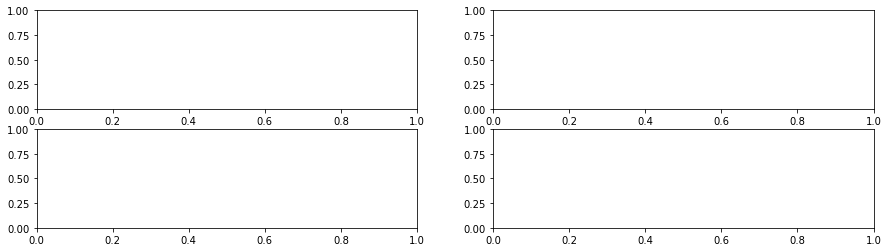

In [24]:
import xarray.plot as xplt

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(15,4))

alb = ["black_sky_albedo", "white_sky_albedo", "blue_sky_albedo"] 
b1means.isel(season="DJF")["black_sky_albedo"].plot.line(ax=axes[0])

dir(axes)

## b

## c

## d

## e

## f